# Part 1 Describing a Single Set of Data

In [22]:
from collections import Counter
import matplotlib.pyplot as plt

# For a small enough dataset, this might even be the best description. But for a larger dataset, this is unwieldy and probably opaque.
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,11]

# As a first approach, you put the friend counts into a histogram using Counter and plt.bar
friend_counts = Counter(num_friends)
print(friend_counts)

Counter({15: 4, 13: 4, 21: 2, 19: 2, 18: 2, 14: 2, 100: 1, 49: 1, 41: 1, 40: 1, 25: 1, 16: 1, 12: 1, 11: 1})


In [23]:
xs = range(101)
ys = [friend_counts[x] for x in xs]

print(ys)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 2, 4, 1, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


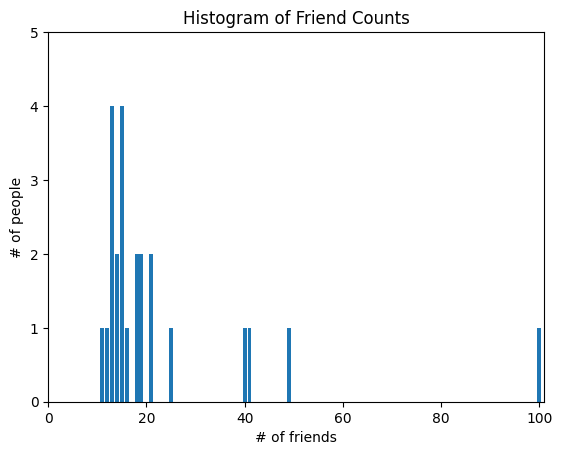

In [24]:
plt.bar(xs, ys)
plt.axis([0, 101, 0, 5])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [25]:
# Unfortunately, this chart is still too difficult to slip into conversations. 
# So you start generating some statistics. Probably the simplest statistic is the number of data points:
num_points = len(num_friends)
print(num_points)

24


In [26]:
# You might also want to know the largest and smallest values:
largest_value = max(num_friends)
smallest_value = min(num_friends)
print(largest_value)
print(smallest_value)

100
11


In [27]:
# which are just special cases of wanting to know the values in sorted order:
sorted_values = sorted(num_friends)
print(sorted_values)

smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]
print(smallest_value)
print(second_smallest_value)
print(second_largest_value)

[11, 12, 13, 13, 13, 13, 14, 14, 15, 15, 15, 15, 16, 18, 18, 19, 19, 21, 21, 25, 40, 41, 49, 100]
11
12
49


## Part 1.1 Central Tendencies

Usually, we’ll want some notion of where our data is centered. Most commonly we’ll use the mean (or average). However, the mean is sensitive to outliers.

In [28]:
from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

print(mean(num_friends))

22.916666666666668


Or sometimes we’ll use the median, which is the middle value of a sorted version of our data.

In [29]:
# The underscores indicate that these are “private” functions, as they’re intended to be called by our median function but not by other people using our statistics library.
def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

print(median(num_friends))

15.5


A generalization of the median is the quantile, which represents the value less than which a certain percentile of the data falls. The median is the 50th percentile.

In [32]:
def quantile(xs: List[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

# [
# 11, 12, 13, 13, 13, 13, 
# 14, 14, 15, 15, 15, 15, 
# 16, 18, 18, 19, 19, 21, 
# 21, 25, 40, 41, 49, 100
# ]
assert quantile(num_friends, 0.10) == 13 # 24 * 0.10 = 2.4 -> 2 -> sorted_values[2] = 13
assert quantile(num_friends, 0.25) == 14 # 24 * 0.25 = 6 -> 6 -> sorted_values[6] = 14
assert quantile(num_friends, 0.75) == 21 # 24 * 0.75 = 18 -> 18 -> sorted_values[18] = 21
assert quantile(num_friends, 0.90) == 41 # 24 * 0.90 = 21.6 -> 21 -> sorted_values[21] = 41

Less commonly, we might want to look at the mode, which is the most common value (or values) in the data.

In [37]:
def mode(x: List[float]) -> List[float]:
    """Returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

print(mode(num_friends))

assert set(mode(num_friends)) == {13, 15}

[15, 13]


## Part 1.2 Dispersion

Dispersion refers to measures of how spread out our data is. The range is just the difference between the maximum and minimum values in the data.

In [38]:
# "range" already means something in Python, so we'll use a different name
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

print(data_range(num_friends))

89


The range is zero when all values are the same, which means the data si undispersed as possible. Conversely, if the range is large, then the max is much larger than the min, and the data is dispersed (more spread out).

Like the median, the range doesn’t really tell us much about the data. So we might want to look at the variance or standard deviation. These both measure the average distance between each data point and the mean.

In [51]:
# These functions are learnt from C4
Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"
    
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)
#

<img src="https://images.ctfassets.net/pdf29us7flmy/4UEXUFiVFUgsNA9fZOOQf2/b9e09d7447df4f0253a145ad853eb883/resized.png?w=720&q=100&fm=jpg" width="200" height="100">

In [52]:
# Variance measures how far a set of numbers are spread out from their average value.

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)
    For example, if xs = [1, 2, 3, 4, 5], the result is [-2, -1, 0, 1, 2]"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

print(variance(num_friends))

367.1231884057971


In [54]:
# Standard deviation is the square root of the variance

import math

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

print(standard_deviation(num_friends))

19.160458982127675


Both the variance and standard deviation are sensitive to outliers. So if we have a lot of outliers, we might want to use the range or the interquartile range (IQR) instead. This is quite plainly unaffected by a small number of outliers.

In [55]:
def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

print(interquartile_range(num_friends))

7


# Part 2 Correlation

DataSciencester’s VP of Growth has a theory that the amount of time people spend on the site is related to the number of friends they have on the site (she’s not a VP for nothing), and she’s asked you to verify this.

In [112]:
# Covariance measures how two variables vary in tandem from their means.

daily_minutes = [1.13, 52.08, 51.4, 51.25, 38.36, 40.23, 50.77, 44.54, 41.42, 31.22, 54.01, 27.66, 49.1, 34.76, 38.79, 47.48, 46.62, 36.73, 28.12, 35.57, 32.98, 41.03, 35, 38.65]

daily_hours = [dm / 60 for dm in daily_minutes]

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), f"{len(xs)} and {len(ys)} must have the same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

print(covariance(num_friends, daily_minutes))
print(covariance(num_friends, daily_hours))

-90.83760869565215
-1.513960144927536


- A “large” positive covariance means that x tends to be large when y is large and small when y is small. 
- A “large” negative covariance means the opposite — that x tends to be small when y is large and vice versa. 
- A covariance close to zero means that no such relationship exists.

Nonetheless, this number can be hard to interpret, for a couple of reasons:
- Its units are the product of the inputs’ units (e.g., friend-minutes-per-day), which
can be hard to make sense of. (What’s a “friend-minute-per-day”?)
- If each user had twice as many friends (but the same number of minutes), the
covariance would be twice as large. But in a sense, the variables would be just as
interrelated. Said differently, it’s hard to say what counts as a “large” covariance.

For this reason, it’s more common to look at the correlation, which divides out the standard deviations of both variables:

In [113]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)

    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero
    
print(correlation(num_friends, daily_minutes))
print(correlation(num_friends, daily_hours))

-0.41965830690190653
-0.41965830690190653


The correlation is unitless and always lies between -1 (perfect anti-correlation) and 1 (perfect correlation). A correlation close to 0 indicates no correlation. A number like 0.25 indicates a relatively weak positive correlation, and a number like 0.94 indicates a strong positive correlation.

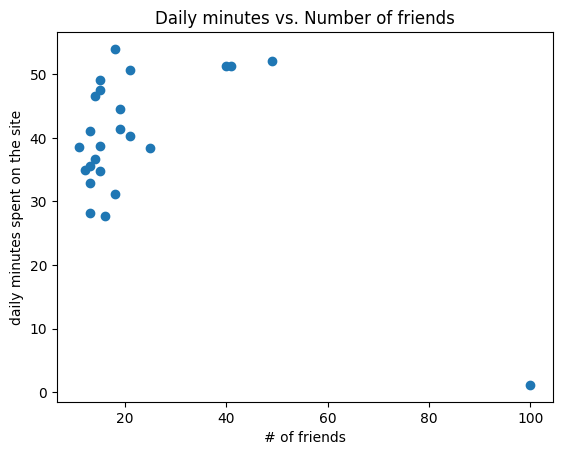

In [114]:
# A scatterplot of daily minutes vs. number of friends

plt.scatter(num_friends, daily_minutes)
plt.title("Daily minutes vs. Number of friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

However, one thing we neglected to do was examine our data for outliers. Outliers can have a large influence on the correlation. For example, if one user spent 0 minutes on the site and had 1000 friends, that would be a pretty strong indicator that our theory is incorrect. If we remove the outlier, the correlation might be much stronger.

In [117]:
outlier = num_friends.index(100) # index of outlier

num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]

daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]
daily_hours_good = [dm / 60 for dm in daily_minutes_good]

print(correlation(num_friends_good, daily_minutes_good))
print(correlation(num_friends_good, daily_hours_good))

0.5650495477952883
0.5650495477952882


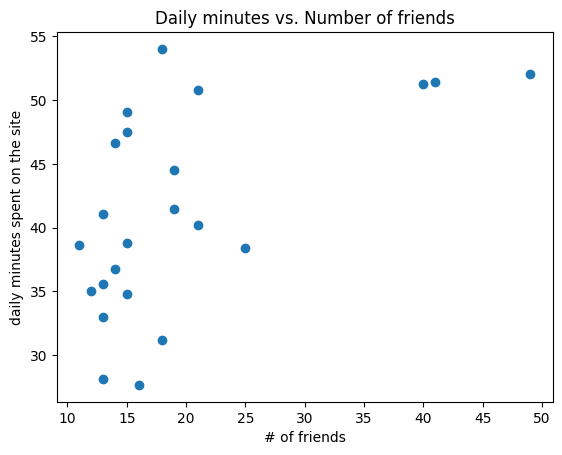

In [118]:
plt.scatter(num_friends_good, daily_minutes_good)
plt.title("Daily minutes vs. Number of friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

# Part 3 Simpson's Paradox

One common surprise when dealing with data is Simpson’s Paradox, in which correlations can be misleading when confounding variables are ignored.

For example, imagine that you can identify all of your members as either East Coast or West Coast. You decide to examine which coast has more friends on average. 

Coast | # of Members | Average # of Friends
--- | --- | ---
East | 101 | 6.5
West | 103 | 8.2

It certainly looks like the West Coast data scientists are friendlier than the East Coast data scientists. Your coworkers advance all sorts of theories as to why this might be: maybe it’s the sun, or the coffee, or the organic produce, or the laid-back Pacific vibe?

But when playing with the data, you discover something very strange. If you look only at people with PhDs, the East Coast data scientists have more friends on average. And if you look only at people without PhDs, the East Coast data scientists also have more friends on average!

Coast | Degree | # of Members | Average # of Friends
--- | --- | --- | ---
East | PhD | 35 | 3.2
West | PhD | 70 | 3.1
East | No PhD | 66 | 13.4
West | No PhD | 33 | 10.9

Once you account for the users’ degrees, the correlation goes in the opposite direction!

The only way to avoid Simpson’s Paradox is to be very careful when interpreting data. Always make sure you’re comparing like with like. And don’t jump to conclusions too quickly. It’s always possible that there’s a confounding variable you’re not seeing.

# Part 4 Some Other Correlational Caveats

In [119]:
# A correlation of zero means there's no linear relationship between the two variables, but it could be that there's a more complicated (nonlinear) relationship.

x = [-2, -1, 0, 1, 2]
y = [2, 1, 0, 1, 2]

print(correlation(x, y))

0.0


x and y have zero correlation as shown, but that doesn’t mean that there’s no relationship between x and y. It just means that there’s no linear relationship between x and y. There might be a more complicated relationship (e.g., y = x^2 or y = |x|).

What they don’t have is a relationship in which knowing how x_i compares to mean(x) gives us information about how y_i compares to mean(y). That is the sort of relationship that correlation looks for.

In [120]:
# In addition, correlation tells you nothing about how large the relationship is.

x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]

print(correlation(x, y))

1.0


x and y are perfectly correlated, but (depending on what you're measuring) it's quite possible that this relationship isn’t very interesting. For example, if x and y are both measured in Fahrenheit or Celsius, then they’ll be perfectly correlated. But this is a pretty boring relationship.

# Part 5 Correlation and Causation

"Correlation does not imply causation" is a phrase you’ll hear often in data science. Just because x and y are correlated doesn’t mean that x causes y, or that y causes x. There might be a third factor that’s causing both x and y. Or it might be simple coincidence.

1) Consider the relationship between num_friends and daily_minutes. It’s possible that having more friends on the site causes DataSciencester users to spend more time on the site. This might be the case if each friend posts a certain amount of content each day, which means **that the more friends you have, the more time it takes to stay current with their updates.**

2) However, it’s also possible that the more time users spend arguing in the DataSciencester forums, the more they encounter and befriend like-minded people. That is, 
**spending more time on the site causes users to have more friends.**

3) A third possibility is that the users who are most passionate about data science spend more time on the site (because they find it more interesting) and more actively collect data science friends (because they don’t want to associate with anyone else).

More simple example: Consider the relationship between ice cream sales and sunburns. These two things are correlated, but it would be a mistake to conclude that ice cream sales cause sunburns or that sunburns cause ice cream sales. Instead, both are related to the temperature.

One way to feel more confident about causality is by conducting randomized trials. If you can randomly split your users into two groups with similar demographics and give one of the groups a slightly different experience, then you can often feel pretty good that the different experiences are causing the different outcomes.

For instance, if you don’t mind being angrily accused of [https://www.nytimes.com/2014/06/30/technology/facebook-tinkers-with-users-emotions-in-news-feed-experiment-stirring-outcry.html], you could randomly choose a subset of your users and show them content from only a fraction of their friends. If this subset subsequently spent less time on the site, this would give you some confidence that having more friends _causes more time to be spent on the site.